In [1]:
# test.py
from D0ToKSpipi2018 import *

# Create an instance to check if the issue is resolved
obj = PyD0ToKSpipi2018()
obj.init()  # Call some methods to ensure functionality

D0ToKSpipi2018 (Apr 30 2024) ==> Initialization !


In [2]:
import uproot as up
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/Int'
f = up.open(int_path+'/weighted_b2dpi_LL_p.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]])
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]])
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]])

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



In [3]:
print(p1)

[[ 0.72667222  0.38910073  0.3382009   0.12105205]
 [ 0.52470529  0.08646234 -0.11523611 -0.08331174]
 [ 0.92568924  0.57752217  0.32489352  0.4125448 ]
 ...
 [ 0.88857251  0.30192552 -0.66217221 -0.11095205]
 [ 0.82845861 -0.48226033 -0.19787192  0.40865102]
 [ 0.55099282  0.05417231 -0.01929997  0.22949133]]


In [4]:
def get_mass(p1,p2):
    return ((p1[:,0]+p2[:,0])**2 - (p1[:,1]+p2[:,1])**2 - (p1[:,2]+p2[:,2])**2 - (p1[:,3]+p2[:,3])**2)


In [5]:
s12 = get_mass(p1[:100000], p2[:100000])
s13 = get_mass(p1[:100000], p3[:100000])
s23 = get_mass(p2[:100000], p3[:100000])

In [6]:
amp = []
ampbar = []
for i in range(100000):
    amp.append(obj.AMP(p1[i].tolist(), p2[i].tolist(), p3[i].tolist()))
    ampbar.append(obj.AMP(p1bar[i].tolist(), p3bar[i].tolist(), p2bar[i].tolist()))

In [7]:
amp = np.array(amp)
ampbar = np.array(ampbar)

In [8]:
def DeltadeltaD(A, Abar):
    temp_var = np.angle(A*np.conj(Abar))-np.pi
    var_1 = np.where(temp_var < -np.pi, temp_var+2*np.pi, temp_var)
    var = np.where(var_1 > np.pi, var_1 - 2*np.pi, var_1)

    return var

In [9]:
np.where(np.isnan(amp**2))

(array([], dtype=int64),)

In [10]:
phaseDiff = DeltadeltaD(amp, ampbar)


(array([ 384.68135664,  621.30511998,  839.2204694 , 1270.28641875,
        1295.70956335, 1272.50272677, 1332.323753  , 1239.26522994,
        1246.80248267, 1252.52212696, 1189.61573742, 1112.70496164,
        1003.20849347,  886.90281436,  748.71484245,  590.05110767,
         603.22305489,  675.97730395,  772.19831255,  807.31765873,
         888.49202311,  948.97903639, 1085.18416796, 1165.71850535,
        1327.69578746, 1489.85269685, 1621.84860129, 2446.9587836 ,
        2534.71480456, 2961.36380262, 3419.94439355, 3195.83409435,
        3125.83005874, 3347.93225797, 2876.95257091, 2870.38266648,
        2487.45292871, 2472.79180468, 2056.46993337, 1951.91630956,
        2057.89789388, 1797.37317789, 1829.00932157, 1615.0674093 ,
        1481.28710891, 1307.0483332 , 1166.14309488, 1051.10636012,
         975.41678791,  791.44455275,  679.76917185,  625.3507058 ,
         549.14590575,  551.15696505,  487.06438234,  426.14364271,
         386.08696505,  380.96679992,  341.13027

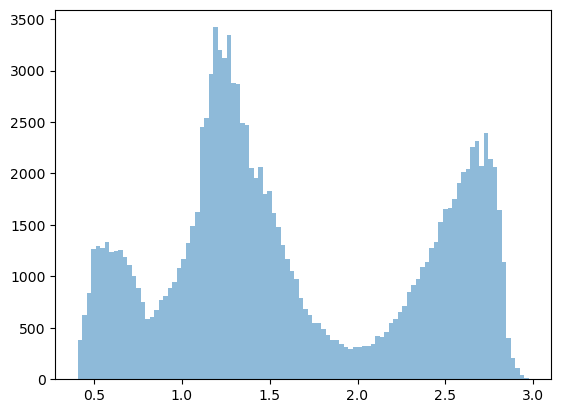

In [11]:
plt.hist(s13, bins=100, alpha=0.5, label='s12', weights=np.abs(amp)**2)

(array([  538.47826669,   893.99355222,   833.36143358,  1006.95453257,
         1026.80419272,  1078.09905999,  1104.27842073,  1134.41945764,
         1260.08035932,  1409.06618524,  1723.98614394,  2409.48570449,
         3873.25305977,  7468.70578678, 12317.15675048, 15963.51636223,
        11193.71078047,  6371.50780981,  4703.86363129,  3287.70517983,
         2531.87698883,  1961.2306196 ,  1609.59451184,  1340.55269186,
         1320.02459213,  1155.89936645,   981.16177615,   920.23346967,
          849.00311096,   782.84771   ,   747.25952761,   708.44335701,
          623.95594053,   609.26166787,   568.6564058 ,   604.4626234 ,
          542.09187291,   520.58584561,   493.24952961,   463.14438509,
          469.90929999,   442.52335704,   458.83384238,   466.44893464,
          461.4864843 ,   468.84550166,   455.2601088 ,   456.02835015,
          472.07438508,   426.08083911,   458.66008914,   490.26100318,
          460.82834451,   495.87378752,   518.17367627,   492.96

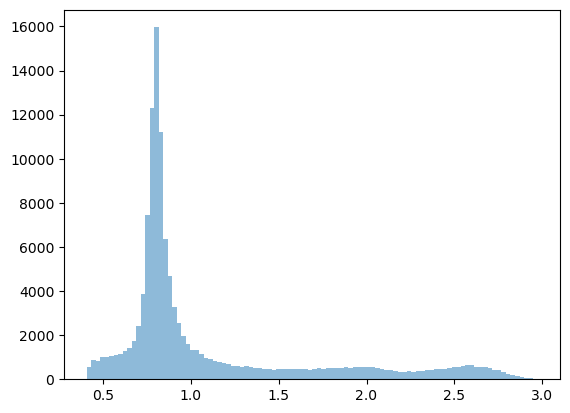

In [12]:
plt.hist(s12, bins=100, alpha=0.5, label='s12', weights=np.abs(amp)**2)

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., 15.,  1., nan],
        [nan, nan, nan, ..., 23., 12.,  9.],
        ...,
        [nan, 11., 19., ..., nan, nan, nan],
        [nan,  6., 18., ..., nan, nan, nan],
        [nan, nan,  8., ..., nan, nan, nan]]),
 array([0.40637659, 0.4320513 , 0.45772602, 0.48340073, 0.50907545,
        0.53475016, 0.56042488, 0.58609959, 0.61177431, 0.63744902,
        0.66312373, 0.68879845, 0.71447316, 0.74014788, 0.76582259,
        0.79149731, 0.81717202, 0.84284674, 0.86852145, 0.89419617,
        0.91987088, 0.9455456 , 0.97122031, 0.99689503, 1.02256974,
        1.04824446, 1.07391917, 1.09959389, 1.1252686 , 1.15094331,
        1.17661803, 1.20229274, 1.22796746, 1.25364217, 1.27931689,
        1.3049916 , 1.33066632, 1.35634103, 1.38201575, 1.40769046,
        1.43336518, 1.45903989, 1.48471461, 1.51038932, 1.53606404,
        1.56173875, 1.58741347, 1.61308818, 1.6387629 , 1.66443761,
        1.69011232, 1.71578704, 1.7

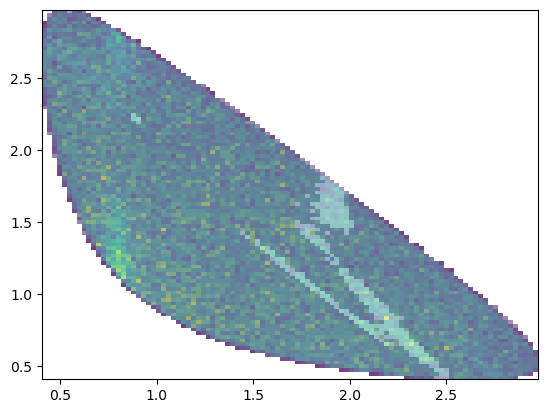

In [13]:
plt.hist2d(s12, s13, bins=100, alpha=0.5, label='s12', weights=np.abs(amp)**2, cmap='viridis', cmin=1)
plt.hist2d(s12, s13, bins=100, alpha=0.5, label='s12', cmin=0.1)


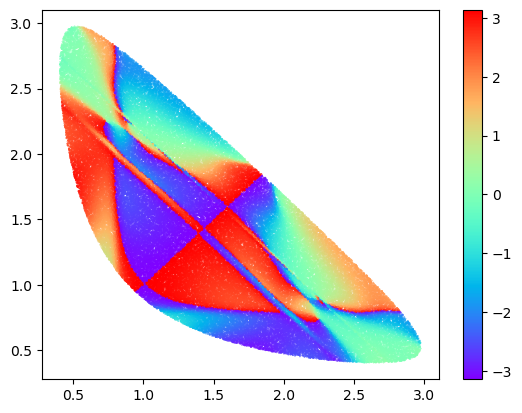

In [14]:
plt.scatter(s12, s13, c=phaseDiff, cmap='rainbow',s=0.1)
plt.colorbar()

In [15]:
import tensorflow as tf
def totalAmplitudeSquared_Integrated_crossTerm(A, Abar):
    '''
    This function calculates the total amplitude squared for the integrated decay, v0.1 only for MD fitted, no correction yet
    '''

    phase = DeltadeltaD(A, Abar)
    
    real_part = cp.sum(cp.abs(A.real)*cp.abs(Abar.real)*cp.cos(phase))
    imag_part = cp.sum(cp.abs(A.real)*cp.abs(Abar.real)*cp.sin(phase))

    print(phase.shape[1])

    return (real_part/A.shape[1], imag_part/Abar.shape[1])

2024-04-30 19:32:57.623909: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [16]:
normalisationCrossTerms_p = totalAmplitudeSquared_Integrated_crossTerm(amp, ampbar)

TypeError: Unsupported type <class 'numpy.ndarray'>

In [ ]:
amp[:,:1]


array([[4.17171231+4.06239963j]])

In [ ]:
cp.abs(amp[:,:1])

array([[5.82290945]])

In [ ]:
mod = amp[:,:1]*cp.conj(amp[:,:1])

In [ ]:
print(cp.abs(mod))

[[33.90627441]]


In [ ]:
A = complex(4.17171231, 4.06239963)

In [ ]:
cp.abs(A)**2

array(33.90627435)

In [ ]:
def abs(A):
    return cp.abs(A*cp.conj(A))

In [ ]:
abs(A)

array(33.90627435)

In [ ]:
import tensorflow as tf
from tensorflow.python.ops.resource_variable_ops import ResourceVariable

In [ ]:
tf.log(A)

AttributeError: module 'tensorflow' has no attribute 'log'